# Question 1 -- recheck numerical calculations

In [1]:
import numpy as np

# Gauss-Legendre weights and nodes for 4-point rule
weights = [0.3478548451, 0.6521451549, 0.6521451549, 0.3478548451]
nodes = [-0.8611363116, -0.3399810436, 0.3399810436, 0.8611363116]

# Function to evaluate
def f(xi):
    x = (np.pi / 2) * (xi + 1)  # Mapping to original domain
    return np.sin(x) * (np.pi / 2)

# Compute the quadrature sum
integral = sum(w * f(xi) for w, xi in zip(weights, nodes))
print(f"Approximated integral: {integral:.6f}")


Approximated integral: 1.999984


# Question 4 - original function vs lagrange interpolate 


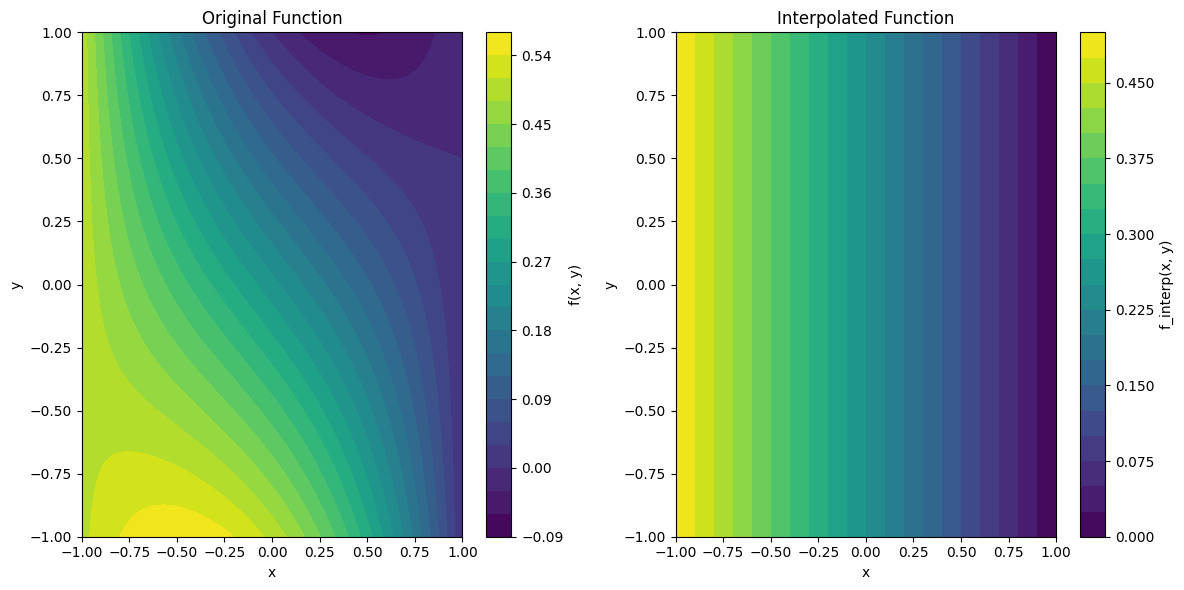

Numerical integral of the interpolated function: 1.0203040506070828


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y)
def f(x, y):
    return 0.25 * (1 - x - y + x**2 * y)

# Define 2D linear Lagrange basis functions on [-1, 1] x [-1, 1]
def phi1(x, y):
    return 0.5 * (1 - x) * 0.5 * (1 - y)

def phi2(x, y):
    return 0.5 * (1 + x) * 0.5 * (1 - y)

def phi3(x, y):
    return 0.5 * (1 + x) * 0.5 * (1 + y)

def phi4(x, y):
    return 0.5 * (1 - x) * 0.5 * (1 + y)

# Vertex coordinates and function values at the vertices
vertices = np.array([[-1, -1], [1, -1], [1, 1], [-1, 1]])
f_values = [f(x, y) for x, y in vertices]

# Interpolated function using Lagrange basis functions
def f_interp(x, y):
    return (
        f_values[0] * phi1(x, y)
        + f_values[1] * phi2(x, y)
        + f_values[2] * phi3(x, y)
        + f_values[3] * phi4(x, y)
    )

# Create a grid for plotting
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute the original function and the interpolated function
F = f(X, Y)
F_interp = f_interp(X, Y)

# Numerically integrate the interpolated function
dx = dy = (x[1] - x[0])
numerical_integral = np.sum(F_interp) * dx * dy

# Plot the original function
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(X, Y, F, cmap='viridis', levels=20)
plt.colorbar(label='f(x, y)')
plt.title('Original Function')
plt.xlabel('x')
plt.ylabel('y')

# Plot the interpolated function
plt.subplot(1, 2, 2)
plt.contourf(X, Y, F_interp, cmap='viridis', levels=20)
plt.colorbar(label='f_interp(x, y)')
plt.title('Interpolated Function')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# Output the numerical integral
print("Numerical integral of the interpolated function:", numerical_integral)


### Question 4 - rechecking gaussian quadrature


In [4]:
import numpy as np

# Define the vertices of the quadrilateral and function values
vertices = [(-1, -1), (1, -1), (1, 1), (-1, 1)]
f_values = [1/4 * (1 - x - y + x**2 * y) for x, y in vertices]  # f(x, y) at the vertices

# Define the 2D linear Lagrange basis functions
def l0(x): return 0.5 * (1 - x)
def l1(x): return 0.5 * (1 + x)

def phi1(x, y): return l0(x) * l0(y)
def phi2(x, y): return l1(x) * l0(y)
def phi3(x, y): return l1(x) * l1(y)
def phi4(x, y): return l0(x) * l1(y)

# Interpolation function
def f_interp(x, y):
    return (f_values[0] * phi1(x, y) +
            f_values[1] * phi2(x, y) +
            f_values[2] * phi3(x, y) +
            f_values[3] * phi4(x, y))

# Quadrature points and weights (2D Gaussian quadrature)
quad_points = [
    (-np.sqrt(1/3), -np.sqrt(1/3)),
    ( np.sqrt(1/3), -np.sqrt(1/3)),
    ( np.sqrt(1/3),  np.sqrt(1/3)),
    (-np.sqrt(1/3),  np.sqrt(1/3))
]
quad_weights = [1, 1, 1, 1]  # All weights are 1

# Compute the integral
integral = 0
for (x, y), w in zip(quad_points, quad_weights):
    integral += w * f_interp(x, y)

print(f"Approximate integral: {integral}")


Approximate integral: 1.0


### Question 4 - basis functions used in gaussian quadrature

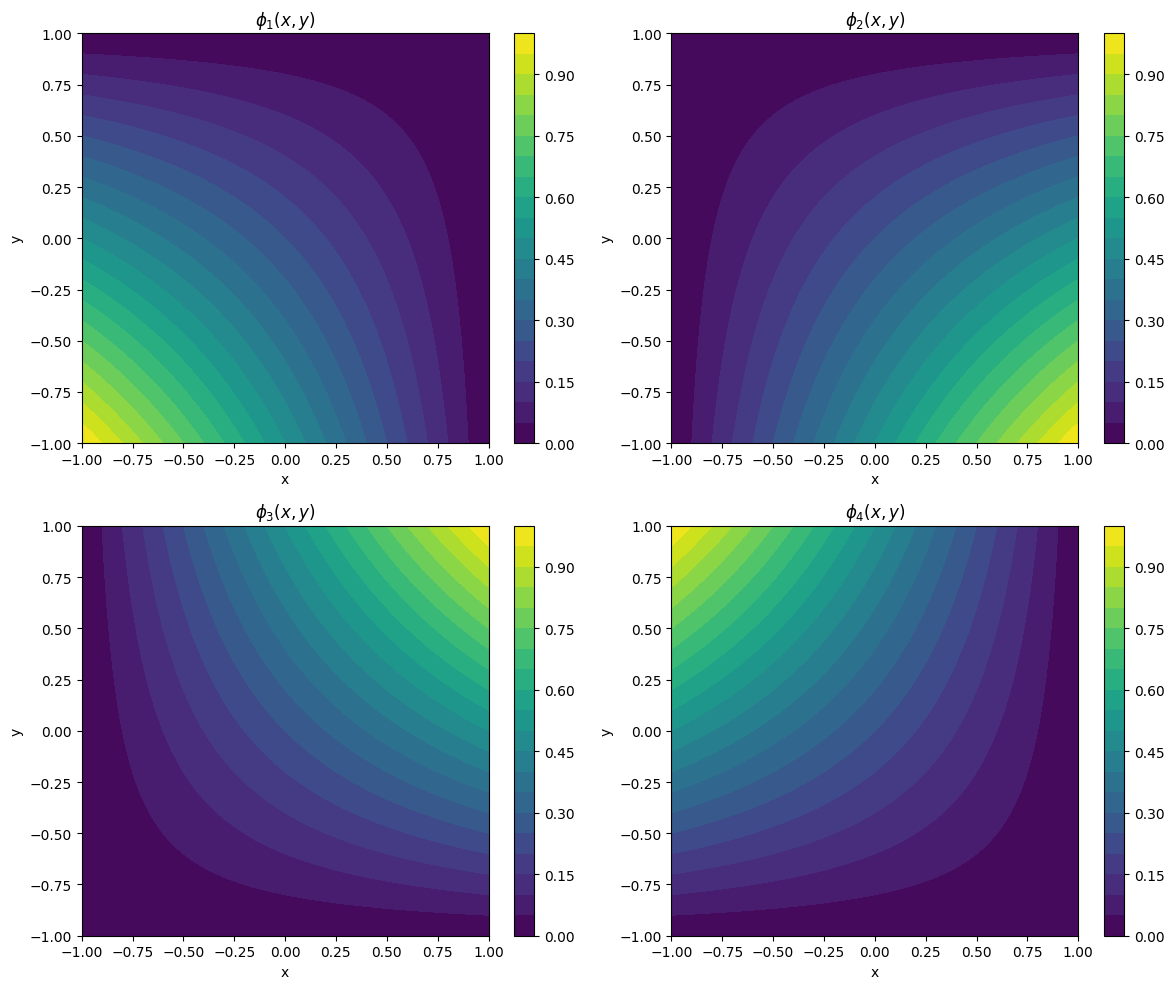

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define 1D linear basis functions
def l0(x):
    return 0.5 * (1 - x)

def l1(x):
    return 0.5 * (1 + x)

# Define 2D linear Lagrange basis functions
def phi1(x, y):
    return l0(x) * l0(y)

def phi2(x, y):
    return l1(x) * l0(y)

def phi3(x, y):
    return l1(x) * l1(y)

def phi4(x, y):
    return l0(x) * l1(y)

# Create a grid for visualization
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute basis functions
Phi1 = phi1(X, Y)
Phi2 = phi2(X, Y)
Phi3 = phi3(X, Y)
Phi4 = phi4(X, Y)

# Plot each basis function
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot phi1
axs[0, 0].contourf(X, Y, Phi1, cmap='viridis', levels=20)
axs[0, 0].set_title(r'$\phi_1(x, y)$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].colorbar = plt.colorbar(axs[0, 0].contourf(X, Y, Phi1, cmap='viridis', levels=20))

# Plot phi2
axs[0, 1].contourf(X, Y, Phi2, cmap='viridis', levels=20)
axs[0, 1].set_title(r'$\phi_2(x, y)$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
axs[0, 1].colorbar = plt.colorbar(axs[0, 1].contourf(X, Y, Phi2, cmap='viridis', levels=20))

# Plot phi3
axs[1, 0].contourf(X, Y, Phi3, cmap='viridis', levels=20)
axs[1, 0].set_title(r'$\phi_3(x, y)$')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')
axs[1, 0].colorbar = plt.colorbar(axs[1, 0].contourf(X, Y, Phi3, cmap='viridis', levels=20))

# Plot phi4
axs[1, 1].contourf(X, Y, Phi4, cmap='viridis', levels=20)
axs[1, 1].set_title(r'$\phi_4(x, y)$')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')
axs[1, 1].colorbar = plt.colorbar(axs[1, 1].contourf(X, Y, Phi4, cmap='viridis', levels=20))

plt.tight_layout()
plt.show()
